In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

### Images

In [2]:
wt_pol_path = direcslist('/Users/blandt/Desktop/Data/PAR2 GCN4/wt', 1)[1]
wt_uni_path = direcslist('/Users/blandt/Desktop/Data/PAR2 GCN4/wt_par3', 1)[0]
gcn4_pol_path = direcslist('/Users/blandt/Desktop/Data/PAR2 GCN4/wt_gcn4', 1)[1]
gcn4_uni_path = direcslist('/Users/blandt/Desktop/Data/PAR2 GCN4/wt_gcn4_par3', 1)[1]

<IPython.core.display.Javascript object>


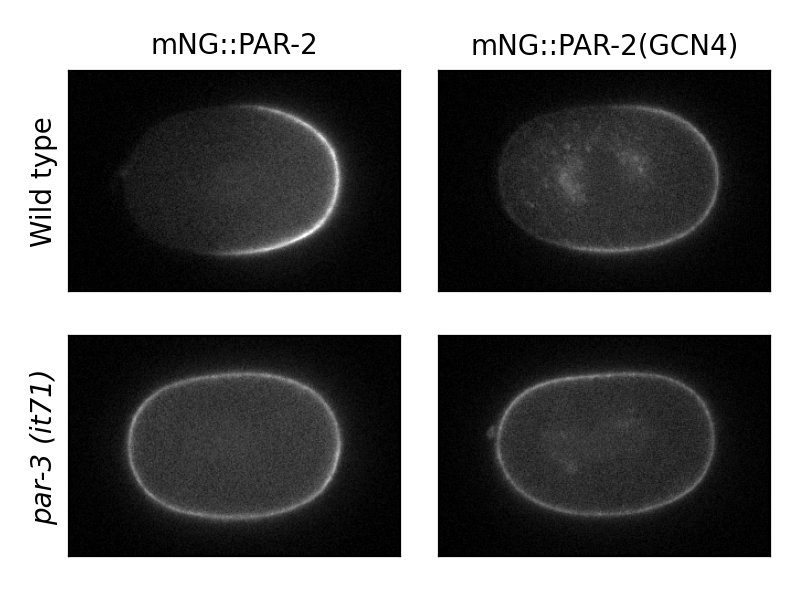

In [8]:
def func(path, ax):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 300, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=25000)
    ax.set_xticks([])
    ax.set_yticks([])
    
fig, ax = plt.subplots(2, 2)
func(wt_pol_path, ax[0][0])
func(gcn4_pol_path, ax[0][1])
func(wt_uni_path, ax[1][0])
func(gcn4_uni_path, ax[1][1])

ax[0][0].set_title('mNG::PAR-2', fontsize=10)
ax[0][1].set_title('mNG::PAR-2(GCN4)', fontsize=10)
ax[0][0].set_ylabel('Wild type', fontsize=10)
ax[1][0].set_ylabel('par-3 (it71)', fontsize=10, style='italic')

fig.set_size_inches(4, 3)
fig.tight_layout()
fig.savefig('Figs par3mut/imgs.png', dpi=600, transparent=True)

### Membrane concentration profile

<IPython.core.display.Javascript object>


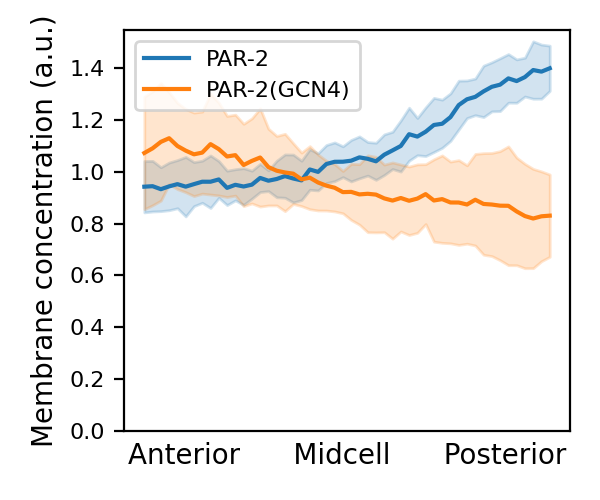

In [5]:
res = pd.read_csv('res.csv')
df = pd.read_csv('df.csv')

def fold(array):
    return (array[:50][::-1] + array[50:]) / 2

mems = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy())
mems = np.array([fold(x) / 10000 for x in mems])
# mems = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy() / x['Cytoplasmic signal'].to_numpy())
# mems = np.array([fold(x) for x in mems])

def func(condition, ax, c, label):
    mems_ = mems[df.Condition == condition]
    mems_mean = np.mean(mems_, axis=0)
    mems_std = np.std(mems_, axis=0)
    ax.plot(mems_mean, c=c, label=label)
    ax.fill_between(np.arange(50), mems_mean - mems_std, mems_mean + mems_std, color=c, alpha=0.2)

   
fig, ax = plt.subplots()
func('wt_par3', ax, 'tab:blue', 'PAR-2')
func('wt_gcn4_par3', ax, 'tab:orange', 'PAR-2(GCN4)')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior      Midcell      Posterior')
ax.set_ylabel('Membrane concentration (a.u.)')
ax.set_xticks([])
# ax.set_ylim(0, 3.5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=8)
fig.set_size_inches(3,2.5)
fig.tight_layout()
fig.savefig('Figs par3mut/membrane_concs.png', dpi=600, transparent=True)

### Dosage

<IPython.core.display.Javascript object>


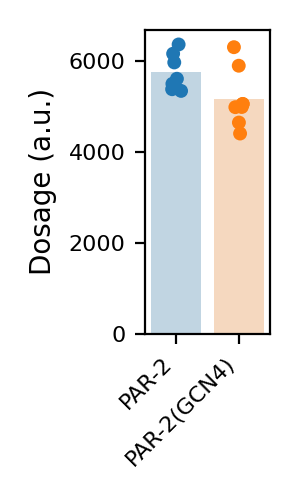

In [7]:
fig, ax = plt.subplots()
order = ['wt_par3', 'wt_gcn4_par3']
sns.stripplot(data=df, x='Condition', y='Dosage', ax=ax, order=order)
sns.barplot(data=df, x='Condition', y ='Dosage', order=order, alpha=0.3, errwidth=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_xlabel('')
ax.set_ylabel('Dosage (a.u.)')
ax.set_xticklabels(['PAR-2', 'PAR-2(GCN4)'])
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(1.5, 2.5)
fig.tight_layout()
fig.savefig('Figs par3mut/dosage_wt_vs_gcn4.png', dpi=600, transparent=True)